# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [22]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [4]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [5]:
df_raw.count()


admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400. Several colums contain nans', which show up as blanks when opened in an excel file.

#### Question 2. Create a summary table

In [6]:
#function

df_summary = df_raw.describe()
df_summary

//anaconda/envs/astroconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [7]:
df_raw.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because GRE covers a much larger range of values (220-800) comapred to GPA (2.26-4.00)

#### Question 4. Drop data points with missing data


In [8]:
df_drop = df_raw.dropna(axis=0, how='any')
print (df_drop.head()) # shows first few values to check we didn't use the wrong how

print (df_drop.isnull().values.any())# checks if there are any nans left in the data frame

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
False


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: df_drop.isnull().values.any() # tells us that there is missing data (nan). Returns True if there are Nans and False if there is not. Alternatively one can look at the results of .count() but the previous method is much easier to interpret.

#### Question 6. Create box plots for GRE and GPA

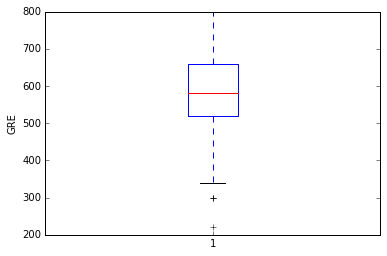

In [9]:
#boxplot 1 # using the dataset where we have just dropped all the nans
plt.figure()
plt.boxplot(df_drop['gre'])
plt.ylabel('GRE')
plt.show()




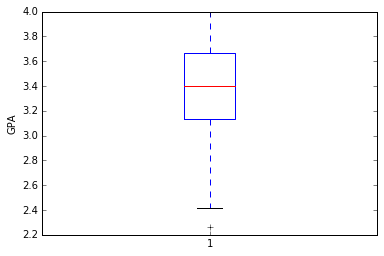

In [10]:
#boxplot 2 

plt.figure()
plt.boxplot(df_drop['gpa'])
plt.ylabel('GPA')
plt.show()

#### Question 7. What do this plots show?

Answer: The boxplots show the 25 and 75 percentile (bottom and top of blue box respectively) of the colums and the medians are shown as a red line within the box. In GRE we are presented with two outliers while in GPA we only have 1 outlier. (It might be interesting to see if it correstponds to an outlier in GRE as well!)

#### Question 8. Describe each distribution 

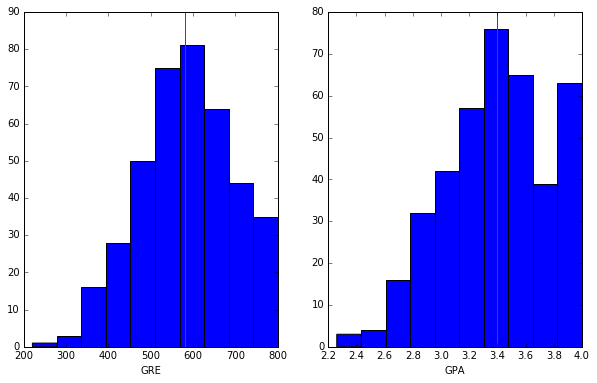

In [11]:
# plot the distribution of each variable 
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df_drop['gre'])
plt.xlabel('GRE')
plt.axvline(np.median(df_drop['gre']), color ='red')
plt.subplot(122)
plt.hist(df_drop['gpa'])
plt.xlabel('GPA')
plt.axvline(np.median(df_drop['gpa']), color ='red')
plt.show()

# For GRE the distribution is single peaked like a normal distribution however there is a tail on the left (low GRE) that is not present at the high value end
# For GPA scores the distribution almost looks bimodal (might be due to binning) and again we have a tail on the low scores but not at the high end
#---> for both distributions the means is shown as the red vertical line

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No as for both GRE and GPA the distribuions are skewed

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes both distributions are skewed (showing a tail on the left) this could be fixed by taking the log 

having actually tried it it does not seem to be working


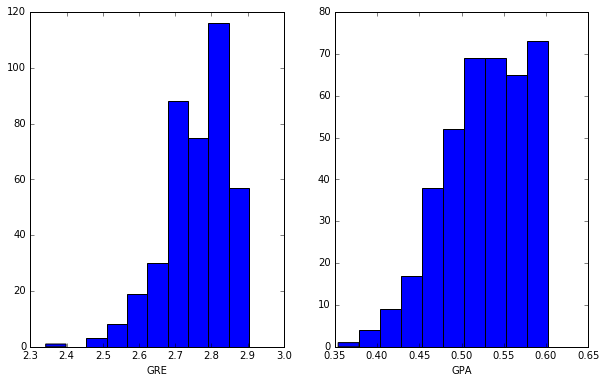

In [21]:
print('having actually tried it it does not seem to be working')

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist((df_drop['gre'].apply(np.log10)))
plt.xlabel('GRE')
#plt.axvline(np.median(df_drop['gre']), color ='red')
plt.subplot(122)
plt.hist((df_drop['gpa'].apply(np.log10)))
plt.xlabel('GPA')
#plt.axvline(np.median(df_drop['gpa']), color ='red')
plt.show()

#### Question 11. Which of our variables are potentially colinear? 

In [15]:
# create a correlation matrix for the data 
# did you mean covariance matrix ??
covariance_matrix=df_drop.cov()

# there is a possibility that gpa and gre are correlated

corr = df_drop['gpa'].corr(df_drop['gre'])
corr

0.38240821243873746

#### Question 12. What did you find?

Answer: Gre and gpa are only very weakly correlated (positive corrolation)

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
- get an overview of the data and eliminate data points with nans
- check whether data follows a normal distribution and correct for that if not
- check all variabled for coliniarity
- divide GRE or GPA results into discreet bins (either works/ both should be done really)
    - then subdivide into the four prestigue levels
    - calculate medians/means to establish wether more students from prestigious schools were admitted eventhough they had the same GPA/GRE score as those from less prestigious schools
    - what is the difference in students admitted from various prestigue levels over the diffferent GRE/GPA bins?
        - make a line plot that looks of the number of admitted students vs GPA (or GRE) for each prestigue level
- from the full dataset look at the mean GPA, GRE grades for each prestigue level do students from prestigues schools score higher marks and are therefore more likely to be admitted ?

#### Question 14. What is your hypothesis? 

Answer: The hypothesis is that students from more prestigious schools are more likely to get accepted into university then students from less prestiguous alma marters with the same GPA score:

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [16]:
# Alternative 1 : use notnull to return only values that are not null then parse the true and false statemens in as a selection criteria
df_raw[df_raw.notnull()]

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [17]:
#Alternative 1 : replacing with mean of data
df_raw.fillna(df_raw.mean())

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0
